This jupyter notebook explores the effect of a change in the fine structure constant on nuclear masses, big bang nucleosynthesis, and solar neutrino emissions. It assumes that $\hbar$, $c$, the parameter of QCD, the parameters of the weak interactions, and the lepton and quark masses are all the same as they are in this universe.

However, the fine structure constant is given by
$$
    \widetilde{\alpha} = \frac{\alpha}{2} = \frac{1}{274}.
$$
As above I will use the greek letter $\alpha$ to refer to the fine structure constant in this universe and I will use $\widetilde \alpha$ (pronounced "alpha tilde") to refer to the alternate universe's fine structure constant.

In the alternate universe, we can assume that the neutron-proton mass difference is given by
$$
    m_n - m_p \approx 2 \; \text{MeV}.
$$

In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Nuclear Masses

Ignoring pairing effects the Weizsäcker mass formula is
$$
    B(A, Z) = a_V A - a_S A^{2/3} - a_C \frac{Z (Z-1)}{A^{1/3}} - a_{\text{sym}} \frac{(N-Z)^2}{A}.
$$

The volume and surface terms are based on the strong nuclear force, so they should remain unchanged in the parallel universe. So we may take
$$
    a_V = 16 \; \text{MeV} \\
    a_S = 17 \; \text{MeV},
$$
from Wong's Introductory Nuclear Physics textbook. Similarly, the symmetry term is not based on the fundamental forces but rather on the Pauli exclusion principle. So we may use the value of $a_{\text{sym}} = 25 \; \text{MeV}$ to be the same as in our universe.

In our universe, $a_C = 0.6 \; \text{MeV}$. We can approximate $a_C$ by equating it with the energy of a charged sphere,
$$
    \frac{3}{5} \frac{Z^2 e^2}{4 \pi \epsilon_0 R} = 
    \frac{3}{5} \frac{Z^2 \alpha \hbar c}{R}
    \approx a_C \frac{Z(Z-1)}{A^{1/3}}.
$$

So if the value of the fine structure constant were reduced by one-half, then the Coulomb term in the mass formula would also be reduced by the same amount,
$$
    \alpha \rightarrow \widetilde{\alpha} = \frac{\alpha}{2}
    \quad \Longrightarrow \quad
    a_C \rightarrow \widetilde{a}_C = \frac{a_C}{2}.
$$
Thus, in the parallel universe, we have $\widetilde{a}_C = 0.3 \; \text{MeV}$.

In [20]:
# Lets set the mass formula constants here
a_V = 16.0 # in MeV
a_S = 17.0 # in MeV
a_C = 0.6 # in MeV, note the lack of tilde in variable name, this is for our universe
a_sym = 25.0 # in MeV

def B(N, Z, alpha_ratio = 1.0):
    """Return the binding energy using the volume, surface,
    and Coulomb terms of the Weizsäcker mass formula. Note
    that we use the alternate unvierse's value of the Coulomb
    term.
    @param[in] A - total neutron number
    @param[in] Z - total proton number
    @param[in] alpha_ratio - ratio of the fine structure constant in parallel
                                   universe to that of our universe
    @returns binding energy in alternate universe"""
    A = np.float64(N) + np.float64(Z)
    term1 = a_V * A
    term2 = a_S * A**(2.0/3.0)
    term3 = a_C * Z * (Z - 1) / A**(1.0/3.0)
    term3 *= alpha_ratio
    term4 = a_sym * (N - Z)**2.0 / A
    return term1 - term2 - term3 - term4

## Nuclide stability

Let's get a feel for the differences between our universes by plotting the neutron and proton drip lines using the mass formula above. The drip lines will be determined by the point at which the separation energies $S_p$ and $S_n$ vanish.

$$S_n = E_B(N+1, Z) - E_B(N, Z) = 0$$
$$S_p = E_B(N, Z+1) - E_B(N, Z) = 0$$

In [21]:
def S_n(n, z, alpha_ratio):
    return B(n + 1, z, alpha_ratio) - B(n, z, alpha_ratio)

def S_p(n, z, alpha_ratio):
    return B(n, z + 1, alpha_ratio) - B(n, z, alpha_ratio)

Let's plot the regions of stability bounded by the drip lines. In the region of stability,

$$S_n(N, Z) \times S_p(N, Z) > 0.$$

Thus, if we plot the contour for $S_n \times S_p$ and restrict the plot to positive values only, we will find the stability region.

In [22]:
n = np.arange(1.0, 100.0, 1.0)
z = np.arange(1.0, 100.0, 1.0)
N, Z = np.meshgrid(n, z)

# S_ours is for our universe, S_theirs is for the alternate universe with a different fine structure constant
S_theirs = S_n(N, Z, 0.5) * S_p(N, Z, 0.5)
S_ours = S_n(N, Z, 1.0) * S_p(N, Z, 1.0)

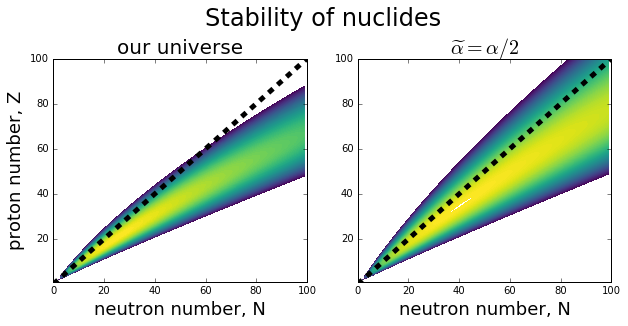

In [27]:
fig1 = plt.figure(num=None, figsize=(10, 4), dpi=320, facecolor='w', edgecolor='k')

ax1 = fig1.add_subplot(1,2,1)
ax1.set_ylim(bottom=1.0, top=100.0)
levels = np.arange(0, np.nanmax(S_ours), 1)
CP_ours = ax1.contourf(N, Z, S_ours, cmap='viridis', levels=levels)
ax1.plot([0, 100], [0, 100], color='black', ls='--', linewidth=5)
ax1.set_xlabel("neutron number, N", fontsize=18)
ax1.set_ylabel("proton number, Z", fontsize=18)
ax1.set_title(r"our universe", fontsize=20)

ax2 = fig1.add_subplot(1,2,2)
ax2.set_ylim(bottom=1.0, top=100.0)
levels = np.arange(0, np.nanmax(S_theirs), 1)
CP_theirs = ax2.contourf(N, Z, S_theirs, cmap='viridis', levels=levels)
ax2.plot([0, 100], [0, 100], color='black', ls='--', linewidth=5)
ax2.set_xlabel("neutron number, N", fontsize=18)
#Share y label
#ax2.set_ylabel("proton number, Z", fontsize=18)
ax2.set_title(r"$\widetilde{\alpha} = \alpha / 2$", fontsize=20)

fig1.suptitle(r"Stability of nuclides", y =1.08, fontsize=24)

plt.savefig("fig/nuclides.pdf", bbox_inches="tight")

## Identifying stable nuclei

For a fixed nucleon number, A, one can find the optimal proton number by maximizing the binding energy.
$$
    \left. \frac{d E_b}{d Z}\right|_{\text{fixed A}} =
    - a_C \frac{2Z - 1}{A^{1/3}}
    + a_{\text{sym}} \frac{4 (A - 2Z)}{A}
    \overset{!}{=} 0.
$$
Let's solve this constraint using `sympy`.

In [7]:
import sympy
sympy.init_printing()

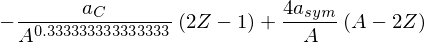

In [8]:
# Declare sympy symbols
ac, asym, zz, aa = sympy.symbols('a_C a_sym Z A', real=True, positive=True)
# Print the constraint
constraint = asym * 4 * (aa - 2 * zz) / aa - ac * (2 * zz - 1) / aa**(1/3)
constraint

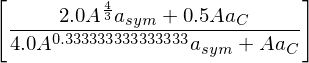

In [9]:
# Solve the constraint for the optimal proton number as a function of A
opt_Z_sympy = sympy.solve(constraint, zz)
opt_Z_sympy

In [10]:
# Insert this expression for Z into the binding energy formula
av, asurf, nn = sympy.symbols('a_V a_S N', real=True, positive=True)
e_b = av * aa - asurf * aa**(2/3) - ac * zz * (zz - 1) / aa**(1/3) - asym * (aa - 2 * zz)**2 / aa
e_b_A_only = e_b.subs(zz, 0.5*(4.0*aa**(4/3)*a_sym + aa*a_C)/(4.0*aa**0.333333333333333*a_sym + aa*a_C))

In [11]:
# Create a numpy function for this expression
e_b_A = sympy.lambdify((aa, av, asurf, ac, asym), e_b_A_only, 'numpy')

# and for the optimal Z expression
opt_Z = sympy.lambdify((aa, ac, asym), opt_Z_sympy, 'numpy')

In [12]:
def find_most_stable_nucleus(alpha_ratio = 1.0):
    """Find the most stable nucleus given the ratio of the fine structure constant
    in parallel universe to that of our universe
    @param[in] alpha_ratio - ratio of the fine structure constant in parallel
                                      universe to that of our universe
    @returns A, Z, BE_per_A - tuple containing total nucleon number, proton number, and binding energy per nucleon"""
    nuclei = np.arange(1, 250)
    energies = (e_b_A(nuclei, a_V, a_S, alpha_ratio * a_C, a_sym) / nuclei)
    A = energies.argmax() + 1
    float_Z = opt_Z(A, alpha_ratio * a_C, a_sym)
    B_ceil = B(A-np.ceil(float_Z), np.ceil(float_Z), alpha_ratio = alpha_ratio)
    B_floor = B(A-np.floor(float_Z), np.floor(float_Z), alpha_ratio = alpha_ratio)
    if (B_ceil > B_floor):
        Z = np.ceil(float_Z)[0]
        BE = B_ceil[0]
    else:
        Z = np.floor(float_Z)[0]
        BE = B_floor[0]
    return A, Z, BE / A

In [13]:
print(find_most_stable_nucleus(alpha_ratio = 1.0))
print(find_most_stable_nucleus(alpha_ratio = 0.5))

(67, 31.0, 9.624636771245056)
(117, 55.0, 10.877692776797046)


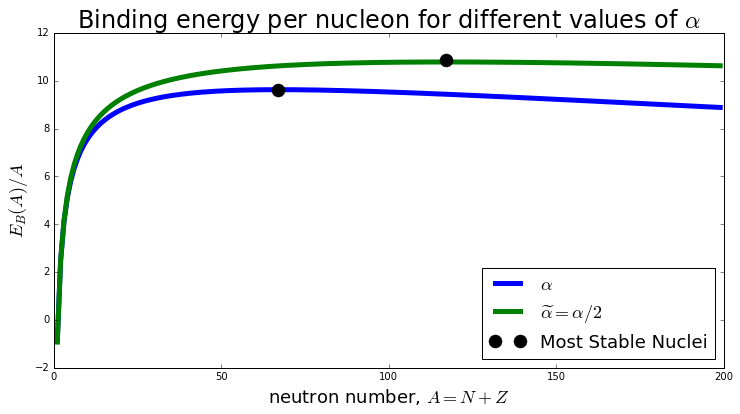

In [40]:
fig2 = plt.figure(num=None, figsize=(12, 6), dpi=320, facecolor='w', edgecolor='k')

nuclei = np.arange(1,200)
ax = fig2.add_subplot(1,1,1)
ax.plot(nuclei, e_b_A(nuclei, a_V, a_S, 1.0 * a_C, a_sym)/ nuclei, label=r"$\alpha$", linewidth=5)
ax.plot(nuclei, e_b_A(nuclei, a_V, a_S, 0.5 * a_C, a_sym)/ nuclei, label=r"$\widetilde{\alpha}=\alpha/2$", linewidth=5)
best_A_ours, best_Z_ours, energy_ours = find_most_stable_nucleus(alpha_ratio = 1.0)
best_A_theirs, best_Z_theirs, energy_theirs = find_most_stable_nucleus(alpha_ratio = 0.5)
ax.plot([best_A_ours, best_A_theirs], [energy_ours, energy_theirs], marker="o", markersize=13,
         linestyle="", color="black",
         label=r"Most Stable Nuclei")
ax.set_xlabel(r"neutron number, $A = N + Z$", fontsize=18)
ax.set_ylabel(r"$E_B(A) / A$", fontsize=18)
ax.set_title(r"Binding energy per nucleon for different values of $\alpha$", fontsize=24)
ax.legend(fontsize=18, loc="lower right")

plt.savefig("fig/binding_energy.pdf", bbox_inches="tight")

In [15]:
def find_stable_isotope(Z, alpha_ratio = 1.0):
    """Find the most stable isotope for a given nucleon number
    @param[in] A - total nucleon number
    @param[in] alpha_ratio - ratio of the fine structure constant in parallel
                                      universe to that of our universe
    @returns Z - proton number of most stable isotope for given A"""
    N = np.arange(0, 200, 1)
    nn, zz = np.meshgrid(N, Z)
    aa = nn + zz
    binding_energies = B(nn, zz, alpha_ratio = alpha_ratio) / aa
    opt_N = binding_energies.argmax(axis=1)
    return np.dstack((Z, opt_N))[0]

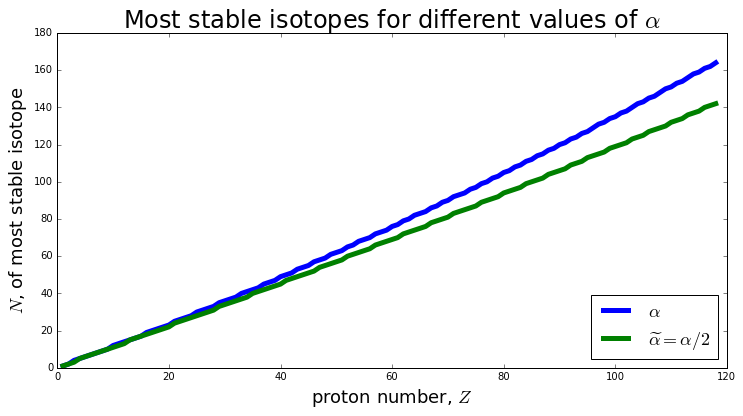

In [41]:
Z = np.arange(1,119)
stable_isotopes_ours = find_stable_isotope(Z, alpha_ratio=1.0)
stable_isotopes_theirs = find_stable_isotope(Z, alpha_ratio=0.5)

fig3 = plt.figure(num=None, figsize=(12, 6), dpi=320, facecolor='w', edgecolor='k')

ax = fig3.add_subplot(1,1,1)
ax.plot(Z, stable_isotopes_ours[:, 1], label=r"$\alpha$", linewidth=5)
ax.plot(Z, stable_isotopes_theirs[:, 1], label=r"$\widetilde{\alpha}=\alpha/2$", linewidth=5)

ax.set_xlabel(r"proton number, $Z$", fontsize=18)
ax.set_ylabel(r"$N$, of most stable isotope", fontsize=18)
ax.set_title(r"Most stable isotopes for different values of $\alpha$", fontsize=24)
ax.legend(fontsize=18, loc="lower right")

plt.savefig("fig/stable_isotopes.pdf", bbox_inches="tight")

## Big Bang Nucleosynthesis

In the early universe, for a given $\mu$ and $T$, the nucleon densities are given by
$$
    n_n = 2 \left( \frac{m_n T}{2 \pi} \right)^{3/2}
    \exp\left( \frac{-m_n}{T} \right) \exp\left( \frac{\mu_n}{T} \right) \\
    n_p = 2 \left( \frac{m_p T}{2 \pi} \right)^{3/2}
    \exp\left( \frac{-m_p}{T} \right) \exp\left( \frac{\mu_p}{T} \right)
$$

For $T \ge 0.7 \; \text{MeV}$, the weak reaction rates that exchange protons and neutrons are fast compared to the expansion rate of the universe, so the difference in neutron and proton chemical potentials is negligible compared to their mass difference. So we can approximate the neutron-proton number density ratio as
$$
    \frac{n_n}{n_p} \approx \exp \left( \frac{- \Delta m}{T} \right),
$$
where $\Delta m = m_n - m_p$.

In the early universe, the temperature is very hot and neutrons and protons are roughly equally numerous. As the temperature of the universe cools below $\Delta m$, free neutrons begin to decay at a rate faster than they are produced by weak reactions. So the neutron fraction decreases until "neutron-proton freeze-out," which occurs at a temperature where the rate of weak reactions is equal to the expansion rate of the universe,
$$
    H(T_f) \approx \Gamma_\text{weak} (T_f).
$$

Since the alternate universe has the same expansion rate and weak interaction parameters as our universe, we may take $T_f$ to be the same that is in our universe ($T_f = 0.7\; \text{MeV}$).

After freeze-out, we can approximate the neutron-proton number density ratio as fixed. This ratio remains fixed until light-element synthesis, when deuterium becomes stable and nearly all of the neutrons are synthesized into ${}^4\text{He}$.

The mass fraction of ${}^4\text{He}$ is then
$$
    X_\text{He} = \frac{n_\text{He} m_\text{He}}{n_\text{He} m_\text{He} + n_\text{H} m_\text{H}}
    \approx \frac{n_\text{He} 4 m_p}{n_\text{He} 4 m_p + n_\text{H} m_p}
    = \frac{n_\text{He} 4}{n_\text{He} 4 + n_\text{H}},
$$
where I have used the approximations $m_\text{H} \approx m_p$ and $m_\text{He} \approx 4 m_p$. Assuming that all of the neutrons are sythesized into ${}^4\text{He}$ we can write $n_\text{He} = n_n / 2$, where $n_n$ is the freeze-out number density of neutrons. So we have
$$
    X_\text{He} = \frac{2 n_n}{2 n_n + n_\text{H}}.
$$
Finally, the synthesis of ${}^4\text{He}$ will consume an equal amount of neutrons and protons. So the remaining hydrogen number density will be simply $n_\text{H} = n_p - n_n$, where $n_p$ is the freeze-out number density of protons. This yields
$$
    X_\text{He} = \frac{2 n_n}{2 n_n + n_p - n_n}
    = \frac{2 \frac{n_n}{n_p}}{1 + \frac{n_n}{n_p}},
$$
where again, $n_n$ and $n_p$ are taken at freeze-out. Inserting the freeze-out number density ratio results in
$$
    X_\text{He} = \frac{2 \exp \left( \frac{- \Delta m}{T_f} \right)}{1 + \exp \left( \frac{- \Delta m}{T_f} \right)}.
$$

Plugging in the mass differences for our universe and the parallel universe yields
$$
    X_\text{He}(\Delta m \approx 2 \; \text{MeV}) \approx 0.109 \\
    X_\text{He}(\Delta m \approx 1.29 \; \text{MeV}) \approx 0.273
$$

## Nuclear reactions in the sun and solar neutrino emissions

Nuclear reactions in stars are governed by a competition between an attractive short-range nuclear potential and the long range Coulomb potential. Consider two nuclei with radii $R_1 \approx 1.4 A_1^{1/3}$ fm and $R_2 \approx 1.4 A_2^{1/3}$ fm at a separation distance of $R = R_1 + R_2$ (i.e. overlap distance). The Coulomb potential at this distance is then
$$
    V_C = \frac{Z_1 Z_2 \alpha \hbar c}{
    1.4 \left(A_1^{1/3} + A_2^{2/3} \right) \; \text{fm}}
    \approx
    \xi \frac{Z_1 Z_2}{
    \left(A_1^{1/3} + A_2^{2/3} \right)} \; \text{MeV},
$$
where $\xi = 1$ in our universe and $\xi = 1/2$ in the parallel universe.

Even when $\xi = 1/2$, $V_C$ will be much larger than the thermal energy of particles in main sequence stars (usually $T \simeq 0.27 - 2.7$ keV). So even in the parallel universe, the nuclei must still tunnel through the Coulomb barrier in order to fuse.

Consider the proton-proton reaction
$$
    p + p \rightarrow d + e^{+} + \nu_e,
$$
which is the main source of solar neutrino production.

The rate of a reaction $1 + 2 \rightarrow 3 + 4 + \ldots$ in a stellar plasma is given by
$$
    r_{12} = \frac{n_1 n_2}{1 + \delta_{12}} \langle \sigma v\rangle,
$$
where $\langle \sigma v \rangle$ is the thermally averaged cross-section,
$$
    \langle \sigma v \rangle = \sqrt{\frac{8}{\mu \pi}}
    \frac{1}{T^{3/2}} \displaystyle \int_0^\infty
    dE \; S(E) \; \exp \left(
        - \frac{E}{T} - \frac{b}{\sqrt{E}}
    \right),
$$
where $b = 2 \pi \sqrt{2 \mu} Z_1 Z_2 \alpha \hbar c$. The cross-section is exponentially suppressed at high energy by the Boltzmann distribution and also at low energy by the Coulomb barrier. The region of energies where the cross-section is high is called the Gamow window, which peaks at $E = E_0$ and has a width of $\Delta$, with
$$
    E_0 = \left( \frac{b T}{2} \right)^{2/3} \\
    \Delta = \frac{4}{\sqrt{3}} \sqrt{E_0 T}.
$$
If the variation of $S(E)$ is small in the interval $E = E_0 \pm \Delta$, we can write the thermally averaged cross-section as
$$
    \langle \sigma v \rangle = \left( \frac{2}{\pi \mu T} \right)^{1/2}
    \left( \frac{\Delta}{T} \right) S(E_0)
    \exp \left( - \frac{3 E_0}{T} \right)
$$

With a reduced value of $b \propto \alpha$, we expect that the Gamow window will become smaller and move to lower energies.

If we parameterize $\widetilde{\alpha} = \xi \alpha$ so that $\xi = 1$ in our universe and $\xi = 1/2$ in the parallel universe.

So we can write the thermally averaged cross-section as
$$
    \langle \widetilde{\sigma v} \rangle
    = \left( \frac{2}{\pi \mu T} \right)^{1/2}
    \left( \frac{\xi^{1/3} \Delta}{T} \right)
    S\left(\xi^{2/3} E_0 \right)
    \exp \left( -\frac{3 \xi^{2/3} E_0}{T} \right) \\
    = \xi^{1/3} \frac{S(\xi^{2/3} E_0)}{S(E_0)}
    \exp \left( - \frac{3 (\xi^{2/3} - 1) E_0}{T} \right)
    \langle \sigma v \rangle.
$$
Thus, the p+p rate of reaction for arbitrary values of $\xi$ can be related to the rate of reaction in our universe by
$$
    \widetilde{r}_{pp} = \xi^{1/3} \frac{S(\xi^{2/3} E_0)}{S(E_0)}
    \exp \left( - \frac{3 (\xi^{2/3} - 1) E_0}{T} \right)
    r_{pp}.
$$
At the core of the sun we have $E_0 / T \sim 4.57$ and $E_0 \sim 5.9 \; \text{keV}$. So the width of the Gamow window for p+p reactions in the sun is
$$
    \Delta = \frac{4}{\sqrt{3}} \frac{E_0}{\sqrt{4.57}}
    \approx 6.37 \; \text{keV}.
$$
So for $\xi = 1/2$, we see that $\xi^{2/3} E_0 \approx 3.72$ is well within the Gamow window $E_0 \pm \Delta$. Then we can assume that the variation in $S(E)$ is small between $E = E_0$ and $E = \xi^{2/3} E_0$ and drop the ratio of S-factors from the rate equation,
$$
    \widetilde{r}_{pp} = \xi^{1/3}
    \exp \left( - \frac{3 (\xi^{2/3} - 1) E_0}{T} \right)
    r_{pp}.
$$
Then for the core of the sun, with $E_0 / T \sim 4.57$ and $\xi = 1/2$, we have
$$
    \widetilde{r}_{pp} = 126.75 \; r_{pp}.
$$
In our universe, in the core of the sun, the p + p rate is $r_{pp} \sim 0.5 \times 10^8 / \text{cm}^3 / \text{sec}$. So the p + p rate in the parallel universe is
$$
    \widetilde{r}_{pp} = \frac{6.34 \times 10^9}{\text{cm}^3 \; \text{sec}}.
$$
Similarly, the time scale for burning hydrogen in the sun is
$$
    \widetilde{\tau}_\text{sun} = \frac{\tau_\text{sun}}{126.75}
    = \frac{8.6 \; \text{by}}{126.75}
    = 67.85 \; \text{my}.
$$